🎯<strong>Objetivos:</strong><br><br> Existe uma relação entre a salinidade da água e a temperatura da água? Você pode prever a temperatura da água com base na salinidade?

<font size = "4">Importando as bibliotecas necessárias</font>

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set()

<font size = "4">Importando os dados</font>

In [20]:
bottle = pd.read_csv('bottle.csv')

<font size = "4">Dando uma olhada geral na estrutura dos dados</font>

In [21]:
bottle.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [22]:
bottle.describe()

,Cst_Cnt,Btl_Cnt,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,Oxy_µmol/Kg,BtlNum,...,R_CHLA,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1
count,864863.000000,864863.000000,864863.000000,853900.000000,817509.000000,696201.000000,812174.000000,661274.000000,661268.000000,118667.000000,...,225276.000000,225275.000000,864863.000000,122006.000000,1999.000000,224.000000,2084.000000,234.000000,10.000000,84.000000
mean,17138.790958,432432.000000,226.831951,10.799677,33.840350,3.392468,25.819394,57.103779,148.808694,10.497426,...,0.450225,0.198599,228.395694,162.071521,2153.239714,2168.148330,2256.055845,2278.858803,7.948570,7.910983
std,10240.949817,249664.587269,316.050259,4.243825,0.461843,2.073256,1.167787,37.094137,90.187533,6.189688,...,1.208566,0.376539,319.456731,85.722796,112.995202,154.852332,34.844435,58.496495,0.021216,0.077666
min,1.000000,1.000000,0.000000,1.440000,28.431000,-0.010000,20.934000,-0.100000,-0.434900,0.000000,...,-0.010000,-3.890000,0.000000,0.000000,1948.850000,1969.440000,2181.570000,2198.150000,7.923100,7.618300
25%,8269.000000,216216.500000,46.000000,7.680000,33.488000,1.360000,24.965000,21.100000,60.915470,5.000000,...,0.050000,0.050000,46.000000,200.000000,2028.330000,2008.977500,2230.322500,2229.062500,7.931475,7.898675
50%,16848.000000,432432.000000,125.000000,10.060000,33.863000,3.440000,25.996000,54.400000,151.064150,10.000000,...,0.160000,0.110000,126.000000,206.000000,2170.640000,2265.885000,2244.325000,2247.505000,7.946650,7.928850
75%,26557.000000,648647.500000,300.000000,13.880000,34.196900,5.500000,26.646000,97.600000,240.379600,16.000000,...,0.390000,0.230000,302.000000,214.000000,2253.810000,2315.525000,2278.505000,2316.452500,7.963300,7.955100
max,34404.000000,864863.000000,5351.000000,31.140000,37.034000,11.130000,250.784000,214.100000,485.701800,25.000000,...,66.110000,65.300000,5458.000000,424.000000,2367.800000,2364.420000,2434.900000,2437.000000,7.988300,8.047700


In [23]:
print(f'Tamanho do dataset: {bottle.shape[0]} linhas e {bottle.shape[1]} colunas')

Tamanho do dataset: 864863 linhas e 74 colunas


<font size = "4">Escolhendo as features para a criação do modelo</font>

In [24]:
features = { # Colunas de interesse
    'T_degC',
    'Salnty',
}

df_bottle = bottle[features] # Selecionando as colunas de interesse
df_bottle.columns = ['Temperature', 'Salinity']
df_bottle.head()

,Temperature,Salinity
0,10.50,33.440
1,10.46,33.440
2,10.46,33.437
3,10.45,33.420
4,10.45,33.421


In [25]:
#Limitando o dataset para 500 linhas
df_bottle = df_bottle[:500] 

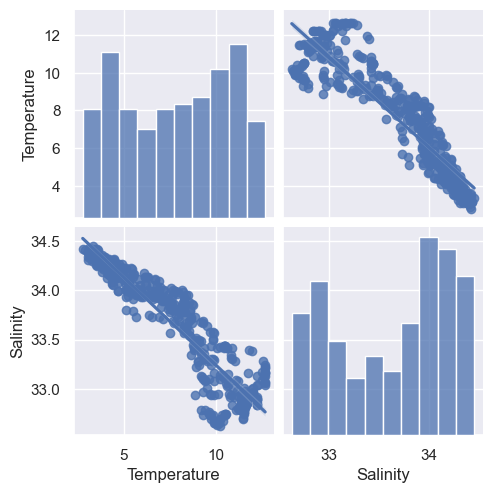

In [26]:
sns.pairplot(df_bottle, kind="reg") # Pairplot com regressão linear

In [27]:
def nulls_summary_table(df): # Função para verificar valores nulos
    null_values = pd.DataFrame(df.isnull().sum())
    null_values[1] = null_values[0]/len(df)
    null_values.columns = ['null_count','null_pct']
    return null_values

nulls_summary_table(df_bottle)

,null_count,null_pct
Temperature,1,0.002
Salinity,6,0.012


In [28]:
df_bottle.fillna(method='ffill', inplace=True) # Preenchendo os valores nulos com o valor anterior não nulo na mesma coluna

<h3>Regressão Linear<h3>

In [29]:
# Separando as variáveis independentes e dependentes
X = np.array(df_bottle['Salinity']).reshape(-1, 1) # Independente (Variavel preditora)
y = np.array(df_bottle['Temperature']).reshape(-1, 1) # Dependente(Variavel alvo)

In [30]:
from sklearn.model_selection import train_test_split
# Separando os dados em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X_train, y_train) # Treinando o modelo

In [32]:
y_pred = model.predict(X_test)                                     # Predict Linear Model
accuracy_score = model.score(X_test, y_test)                       # Accuracy score
print("Linear Regression Model Accuracy Score: " + "{:.1%}".format(accuracy_score))

Linear Regression Model Accuracy Score: 82.7%


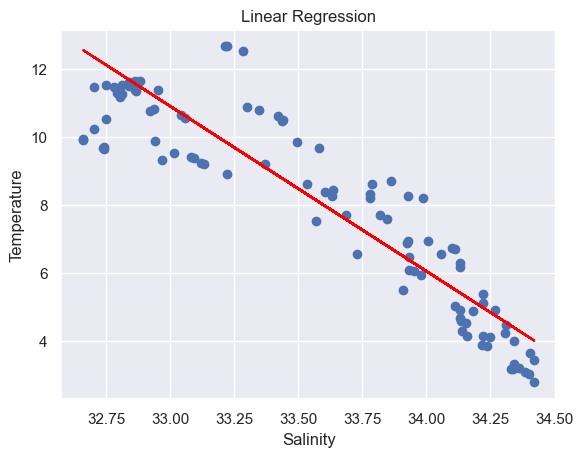

In [33]:
# Plotando o gráfico de dispersão
plt.scatter(X_test, y_test)
plt.plot(X_test, y_pred, color='red')
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Linear Regression')
plt.show()


<h3>Regressão Polinomial<h3>

In [34]:
from sklearn.preprocessing import PolynomialFeatures
# Criando o modelo de regressão polinomial de grau 4
poly4 = PolynomialFeatures(degree=4)
X_poly4 = poly4.fit_transform(X_train)

linreg2 = LinearRegression().fit(X_poly4,y_train) # Treinando o modelo

poly_pred = linreg2.predict(X_poly4)

In [35]:
# Calculando as métricas de avaliação do modelo 
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2 = r2_score(y_train, poly_pred)
mae = mean_absolute_error(y_train, poly_pred)
mse = mean_squared_error(y_train, poly_pred)
rmse = np.sqrt(mse)

print("R2 Score: " + "{:.2}".format(r2))
print("MAE: " + "{:.2}".format(mae)) #
print("MSE: " + "{:.2}".format(mse))
print("RMSE: " + "{:.2}".format(rmse))

R2 Score: 0.92
MAE: 0.64
MSE: 0.65
RMSE: 0.8


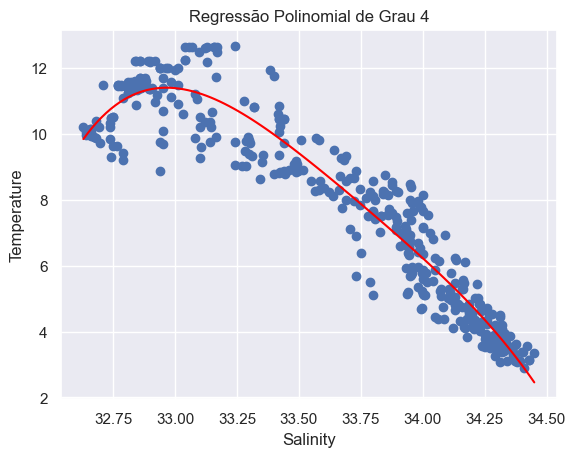

In [36]:
import numpy as np
import matplotlib.pyplot as plt

# Crie um conjunto de valores x para traçar a linha de regressão
x_line = np.linspace(min(X_train), max(X_train), 100).reshape(-1,1) 

# Use a função predict do modelo de regressão linear para calcular os valores de y correspondentes
y_line = linreg2.predict(poly4.transform(x_line)) 

# Traça os dados de exemplo como pontos e a linha de regressão como uma curva
plt.scatter(X_train, y_train) 
plt.plot(x_line, y_line, color='red') 
plt.xlabel('Salinity')
plt.ylabel('Temperature')
plt.title('Regressão Polinomial de Grau 4')
plt.show()
